In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly = pd.DataFrame() 
    # and set poly_sframe['power_1'] equal to the passed feature
    poly['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly[name] = feature**power
    return poly

In [3]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [4]:
l2_small_penalty = 1.5e-5

In [7]:
from sklearn import linear_model
import numpy as np

poly15_data = polynomial_sframe(sales['sqft_living'], 15) # use equivalent of `polynomial_sframe`
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, normalize=True)

In [9]:
model.coef_

array([ 1.24873306e+02, -4.77376011e-02,  3.01446238e-05, -2.44419942e-09,
       -1.94153675e-13,  8.54085686e-18,  1.51142121e-21,  8.27979094e-26,
        6.52603100e-31, -3.27895017e-34, -3.87962315e-38, -2.72437650e-42,
       -1.07790800e-46,  3.78242694e-51,  1.39790296e-54])

In [17]:
l2_small_penalty=1e-9

In [23]:
def plot_15degree(set):
    poly15_data = polynomial_sframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print(pd.Series(model15.coef_,index=my_features)) #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'],model15.predict(poly15_data[my_features].values),'-')

In [24]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

power_1     5.446694e+02
power_2    -3.554476e-01
power_3     1.224464e-04
power_4    -1.171753e-08
power_5    -3.905127e-13
power_6    -1.390759e-17
power_7     1.478603e-20
power_8     6.874916e-25
power_9    -7.572040e-29
power_10   -1.040973e-32
power_11   -3.718443e-37
power_12    3.399893e-41
power_13    5.565921e-45
power_14    2.537614e-49
power_15   -3.351529e-53
dtype: float64


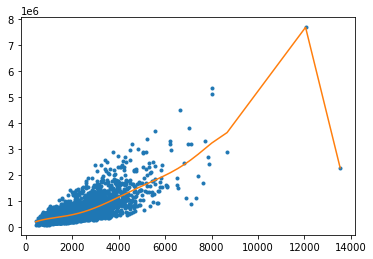

In [25]:
plot_15degree(set_1)

power_1     8.593627e+02
power_2    -8.181183e-01
power_3     4.288800e-04
power_4    -9.127707e-08
power_5    -2.696044e-12
power_6     3.739803e-15
power_7    -1.427119e-19
power_8    -6.307947e-23
power_9    -1.445596e-27
power_10    7.443214e-31
power_11    9.258659e-35
power_12    3.280128e-41
power_13   -1.295435e-42
power_14   -1.387812e-46
power_15    1.665464e-50
dtype: float64


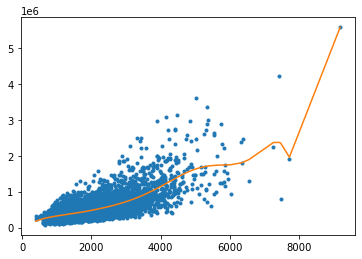

In [26]:
plot_15degree(set_2)

power_1    -7.553960e+02
power_2     9.755795e-01
power_3    -4.589460e-04
power_4     7.779581e-08
power_5     7.150135e-12
power_6    -2.886020e-15
power_7    -2.136777e-20
power_8     3.380852e-23
power_9     2.191782e-27
power_10   -1.970678e-31
power_11   -4.159932e-35
power_12   -1.801961e-39
power_13    3.190711e-43
power_14    5.084569e-47
power_15   -3.933043e-51
dtype: float64


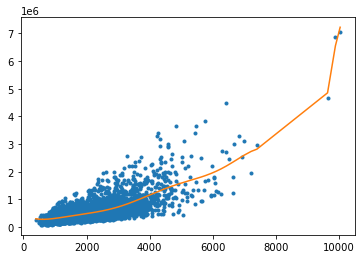

In [27]:
plot_15degree(set_3)

power_1     1.119446e+03
power_2    -9.837602e-01
power_3     3.387709e-04
power_4     3.603772e-08
power_5    -4.378140e-11
power_6     5.771917e-15
power_7     7.667952e-19
power_8    -9.492977e-23
power_9    -1.960308e-26
power_10   -2.108803e-32
power_11    3.310051e-34
power_12    3.477339e-38
power_13   -2.430393e-42
power_14   -8.795532e-46
power_15    6.445697e-50
dtype: float64


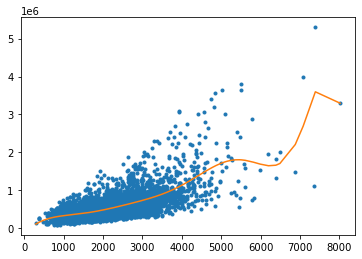

In [28]:
plot_15degree(set_4)

In [29]:
l2_large_penalty=1.23e2

In [31]:
def plot_15degree(set):
    poly15_data = polynomial_sframe(set['sqft_living'], 15)
    my_features = poly15_data.columns
    poly15_data['price'] = set['price']
    model15 = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    model15.fit(poly15_data[my_features], poly15_data['price'])
    print(pd.Series(model15.coef_,index=my_features)) #use print vs. return since return can only apply to function
    plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'],model15.predict(poly15_data[my_features].values),'-')

power_1     2.328068e+00
power_2     3.536216e-04
power_3     3.319697e-08
power_4     2.000825e-12
power_5     1.114926e-16
power_6     6.577861e-21
power_7     4.129395e-25
power_8     2.703938e-29
power_9     1.816148e-33
power_10    1.238243e-37
power_11    8.518725e-42
power_12    5.894556e-46
power_13    4.095426e-50
power_14    2.854649e-54
power_15    1.995475e-58
dtype: float64


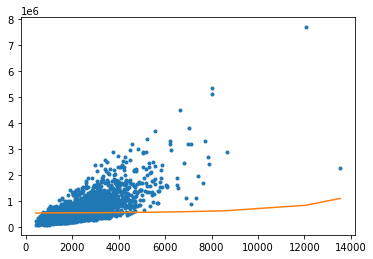

In [32]:
plot_15degree(set_1)

power_1     2.097569e+00
power_2     3.908175e-04
power_3     6.671899e-08
power_4     8.900030e-12
power_5     9.726399e-16
power_6     9.697337e-20
power_7     9.505645e-24
power_8     9.444910e-28
power_9     9.571913e-32
power_10    9.869452e-36
power_11    1.031011e-39
power_12    1.087298e-43
power_13    1.154537e-47
power_14    1.232113e-51
power_15    1.319867e-55
dtype: float64


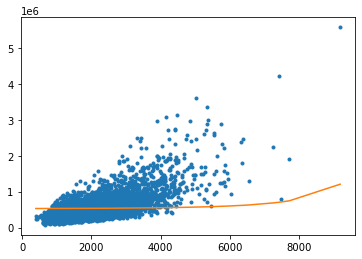

In [33]:
plot_15degree(set_2)

power_1     2.289063e+00
power_2     4.124722e-04
power_3     6.088353e-08
power_4     6.585722e-12
power_5     6.152782e-16
power_6     5.644466e-20
power_7     5.288344e-24
power_8     5.070914e-28
power_9     4.946573e-32
power_10    4.880438e-36
power_11    4.850091e-40
power_12    4.841615e-44
power_13    4.846350e-48
power_14    4.858836e-52
power_15    4.875585e-56
dtype: float64


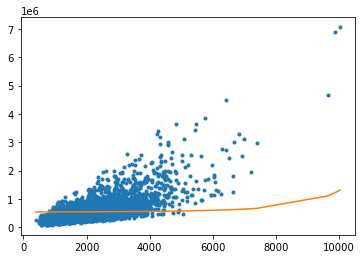

In [34]:
plot_15degree(set_3)

power_1     2.085962e+00
power_2     4.050358e-04
power_3     7.468646e-08
power_4     1.130966e-11
power_5     1.458644e-15
power_6     1.735613e-19
power_7     2.016096e-23
power_8     2.346053e-27
power_9     2.756361e-31
power_10    3.270431e-35
power_11    3.910469e-39
power_12    4.701180e-43
power_13    5.672123e-47
power_14    6.859581e-51
power_15    8.308436e-55
dtype: float64


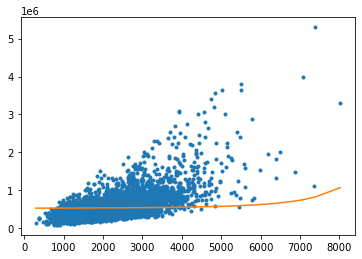

In [35]:
plot_15degree(set_4)

In [36]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [40]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
print(n)
for i in range(k):
    start = (n*i)/k
    end = ((n*(i+1))/k)-1
    print (i, (start, end))

19396
0 (0.0, 1938.6)
1 (1939.6, 3878.2)
2 (3879.2, 5817.8)
3 (5818.8, 7757.4)
4 (7758.4, 9697.0)
5 (9698.0, 11636.6)
6 (11637.6, 13576.2)
7 (13577.2, 15515.8)
8 (15516.8, 17455.4)
9 (17456.4, 19395.0)


In [80]:

def k_fold_cross_validation(k, l2_penalty):
    # form validation set by taking a slice (start:end+1) from the data
    n = len(train_valid_shuffled)
    RSS_list = []
    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
    
        validation_set = train_valid_shuffled.loc[start:end+1]
        training_set = train_valid_shuffled.loc[0:start].append(train_valid_shuffled.loc[end+1:n])
        poly15_data = polynomial_sframe(training_set['sqft_living'], 15)
        valid_data = polynomial_sframe(validation_set['sqft_living'], 15)
        my_features = poly15_data.columns
        poly15_data['price'] = training_set['price']
        valid_data['price'] = validation_set['price']
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        model.fit(poly15_data[my_features],poly15_data['price'])
        RSS = np.sum((model.predict(valid_data[my_features]) -valid_data['price'])**2)
        RSS_list.append(RSS)
    average_validation_error = np.mean(RSS_list)
    return average_validation_error

In [81]:
l2_penalty = np.logspace(3, 9, num=13)

In [82]:
for i in l2_penalty:
    print(i," "*4,k_fold_cross_validation(10, i))

1000.0      264985448170443.0
3162.2776601683795      265701029746749.34
10000.0      265932464987180.3
31622.776601683792      266006178217030.2
100000.0      266029541476032.8
316227.7660168379      266036934908569.8
1000000.0      266039273449751.8
3162277.6601683795      266040013014670.7
10000000.0      266040246890959.7
31622776.60168379      266040320849668.9
100000000.0      266040344237519.5
316227766.01683795      266040351633412.6
1000000000.0      266040353972199.84


283265705430072.56


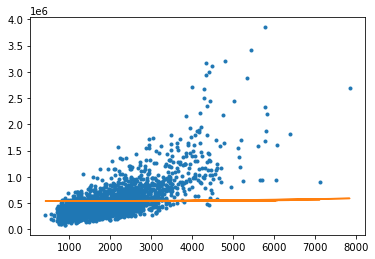

In [87]:
poly15_data = polynomial_sframe(test['sqft_living'], 15)
test_features = poly15_data.columns
poly15_data['price'] = test['price']
model_test = linear_model.Ridge(alpha=1000, normalize=True)
model_test.fit(poly15_data[test_features], poly15_data['price'])
RSS_test = np.sum((model_test.predict(poly15_data[test_features]) - poly15_data['price'])**2)
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
    poly15_data['power_1'],model_test.predict(poly15_data[test_features].values),'-')
print(RSS_test)